In [4]:
# https://machinelearningmastery.com/lstm-autoencoders/

In [1]:
# lstm autoencoder recreate sequence
from numpy import array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.utils import plot_model

from MZPackage.ModelBuilder import ModelBuilder
from MZPackage.Utilities import *
import numpy as np

In [2]:
mb = ModelBuilder()
trainingSet = loadData("Second_Test_System_Fault_Generator/normalized_normal")
targetSet = loadData("Second_Test_System_Fault_Generator/normalized_fault")

In [3]:
randIndexes = np.random.choice(trainingSet.shape[0], 1000)
trainingSet = trainingSet[randIndexes,:,:]
targetSet = targetSet[randIndexes,:,:]
randIndexes = np.random.choice(trainingSet.shape[0], 1000)
testSet = trainingSet[randIndexes,:,:]
testTargetSet = targetSet[randIndexes,:,:]

In [4]:
#seq = np.concatenate((trainingSet[0,:,:],targetSet[0,:,:]))
#plt.plot(seq)

In [5]:
#mb.trainLstm(3,200,trainingSet,targetSet,testSet,testTargetSet,batchSize=32)

In [6]:
trainingSet.shape

(1000, 200, 6, 1)

In [7]:
testSet.shape

(1000, 200, 6, 1)

In [8]:
targetSet.shape

(1000, 200, 6, 1)

In [9]:
mb = ModelBuilder()
modelType = "conv"

trainingSet = np.reshape(trainingSet, (1000,200*6,1), order = 'C')
testSet = np.reshape(testSet, (1000,200*6,1), order = 'C')
targetSet = np.reshape(targetSet, (1000,200*6,1), order = 'C')
testTargetSet = np.reshape(testTargetSet, (1000,200*6,1), order = 'C')


[model, validatoinLoss, numOfEpochs, history] = mb.trainConv(6, trainingSet,targetSet, testSet, testTargetSet, batchSize = 32, filterSize = 4, filtersCountInFirstLayer = 48)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding1d (ZeroPadding1 (None, 1204, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1204, 48)          240       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 602, 48)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 602, 96)           18528     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 301, 96)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 301, 192)          73920     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 151, 192)          0

### Generated fault by CNN model

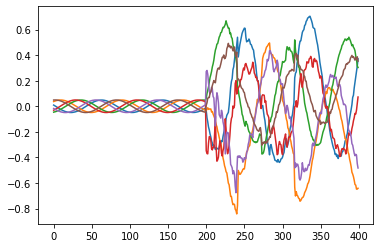

In [10]:
yhat = model.predict(testSet[0:1,:], verbose=0)
seq = np.concatenate((testSet[0,:].reshape([1,200,6])[0,:,:],yhat.reshape([1,200,6])[0,:,:]))
plt.plot(seq)


### Actual fault data sequence

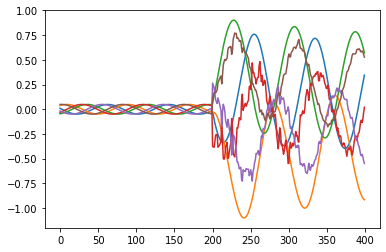

In [11]:
yhat = model.predict(testSet[0:1,:], verbose=0)
seq = np.concatenate((testSet[0,:].reshape([1,200,6])[0,:,:],testTargetSet[0,:].reshape([1,200,6])[0,:,:]))
plt.plot(seq)

### Save model

In [12]:
model.save("Second_System_Fault_Generator_Model/fault_generator_conv.h5")

### Attack samples generation

In [13]:
# testSample = testSet[i:i+1,:]
# prediction = model.predict(testSample, verbose=0)
# attack = np.concatenate((testSample.reshape((1200,1)),prediction.reshape((1200,1))))
# attack = attack.reshape((400,6))[200-47:200+47+1]
# attack.shape

NameError: name 'i' is not defined

In [ ]:
# modelType = "conv"
# trainingSet = getReshapedDataSetNoSplit(trainingSet, modelType)
# testSet = getReshapedDataSetNoSplit(testSet, modelType)
# targetSet = getReshapedDataSetNoSplit(targetSet, modelType)
# testTargetSet = getReshapedDataSetNoSplit(testTargetSet, modelType)

In [14]:
testSetSize = 1000
sequenceLen = 200
dimensionsCount = 6
attackDataSetList = list()
windowLen = 48
halfWindowLen = windowLen // 2
for i in range(testSetSize):
    testSample = testSet[i:i+1,:]
    prediction = model.predict(testSample.reshape((1,1200,1)), verbose=0)
    attackSample = np.concatenate((testSample.reshape((1200,1)),prediction.reshape((1200,1))))
    attackSample = attackSample.reshape((400,6))[200-halfWindowLen:200+halfWindowLen]
    attackDataSetList.append(attackSample)

In [15]:
len(attackDataSetList)

1000

In [16]:
saveData(np.asarray(attackDataSetList),"Second_Test_System_Fault_Generator/attacks_generated_cnn")

### Train a model on dataset generated by GAN

In [2]:

# ganDataSet = loadData("dataset_generated_gan_complete")
# dataSetSize = ganDataSet.shape[0]
# trainingSetSize = 950
# randIndexes = np.random.choice(ganDataSet.shape[0], dataSetSize)
# trainingSet = ganDataSet[randIndexes[:trainingSetSize],0:200,:]
# targetSet = ganDataSet[randIndexes[:trainingSetSize],200:,:]
# testSet = ganDataSet[randIndexes[trainingSetSize:],0:200,:]
# testTargetSet = ganDataSet[randIndexes[trainingSetSize:],200:,:]
# print(trainingSet.shape)
# print(targetSet.shape)

(950, 200, 6)
(950, 200, 6)


In [4]:
# mb = ModelBuilder()
# modelType = "conv"
# trainingSet = getReshapedDataSetNoSplit(trainingSet, modelType)
#
# testSet = getReshapedDataSetNoSplit(testSet, modelType)
# targetSet = getReshapedDataSetNoSplit(targetSet, modelType)
# testTargetSet = getReshapedDataSetNoSplit(testTargetSet, modelType)
# [model, validatoinLoss, numOfEpochs, history] = mb.trainConv(6, trainingSet,targetSet, testSet, testTargetSet, batchSize = 32, filterSize = 4, filtersCountInFirstLayer = 48)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding1d_1 (ZeroPaddin (None, 1204, 1)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1204, 48)          240       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 602, 48)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 602, 96)           18528     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 301, 96)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 301, 192)          73920     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 151, 192)         

In [5]:
# model.save('Fault_Generator_Model/fault_generator_conv_using_GAN.h5')

### Attack sample generation using the model trained on GAN samples

In [16]:
# model = load_model("Fault_Generator_Model/fault_generator_conv_using_GAN.h5")
# trainingSet = loadData("normalized_normal")
# targetSet = loadData("normalized_fault")
# randIndexes = np.random.choice(trainingSet.shape[0], 1000)
# trainingSet = trainingSet[randIndexes,:,:]
# targetSet = targetSet[randIndexes,:,:]
# randIndexes = np.random.choice(trainingSet.shape[0], 1000)
# testSet = trainingSet[randIndexes,:,:]
# testTargetSet = targetSet[randIndexes,:,:]
#
# modelType = "conv"
# trainingSet = getReshapedDataSetNoSplit(trainingSet, modelType)
# testSet = getReshapedDataSetNoSplit(testSet, modelType)
# targetSet = getReshapedDataSetNoSplit(targetSet, modelType)
# testTargetSet = getReshapedDataSetNoSplit(testTargetSet, modelType)
# testSetSize = 1000
# sequenceLen = 200
# dimensionsCount = 6
# attackDataSetList = list()
# windowLen = 48
# halfWindowLen = windowLen // 2
# for i in range(testSetSize):
#     testSample = testSet[i]
#     prediction = model.predict(testSample.reshape((1,1200,1)), verbose=0)
#     attackSample = np.concatenate((testSample.reshape((1200,1)),prediction.reshape((1200,1))))
#     attackSample = attackSample.reshape((400,6))[200-halfWindowLen:200+halfWindowLen]
#     attackDataSetList.append(attackSample)

In [18]:
# saveData(np.asarray(attackDataSetList),"attacks_generated_cnn_using_GAN_data")

In [2]:
# fg = load_model("Fault_Generator_Model/fault_generator_conv.h5")
# fg.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding1d_7 (ZeroPaddin (None, 1204, 1)           0         
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 1204, 48)          240       
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 602, 48)           0         
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 602, 96)           18528     
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 301, 96)           0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 301, 192)          73920     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 151, 192)         